# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Ayu Astari]
- **Email:** [ayu.astari1884@student.unri.ac.id]
- **ID Dicoding:** [ayu_astari10]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara temp (suhu) dan total count pengguna sepeda untuk setiap musim periode 2 tahun?
- Apakah terdapat perbedaan yang signifikan dalam total workingday dan holiday antara musim-musim tersebut?
- Bagaimana pola penggunaan sepeda selama seminggu dan perbedaannya antara hari kerja dan akhir pekan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load data day_df

In [2]:
day_df  = pd.read_csv('https://raw.githubusercontent.com/ayuastari/proyek-analisis-data-dengan-python/main/dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai data day_df

In [3]:
#Informasi mengenai dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = day_df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 731
Jumlah Kolom: 16


In [5]:
# Memeriksa tipe data setiap kolom
tipe_data = day_df.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = day_df.isna().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("\nJumlah Duplikat :", day_df.duplicated().sum())


Jumlah Duplikat : 0


In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Cleaning Data

cleaning day_df

In [9]:
#Menghapus(drop) kolom yang tidak diperlukan
drop_column = ["instant", "hum", "windspeed"]

for n in day_df.columns:
  if n in drop_column:
   day_df.drop(labels=n, axis=1, inplace=True)

In [10]:
#Mengubah nama data menjadi nama yang mudah dipahami
day_df.rename(columns = {
    "dteday":"dateday",
    "yr":"year",
    "mnth":"month",
    "cnt":"count",
}, inplace=True)

In [11]:
#Memberikan keterangan
day_df["year"]= day_df["year"].map({0:2011, 1:2012})
day_df["month"]= day_df["month"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"june", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
day_df["weekday"]= day_df["weekday"].map({0:"Sunday",1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})
day_df["season"]= day_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
day_df["weathersit"]= day_df["weathersit"].map({1:"Clear, Few clouds, Partly cloudy, Partly cloudy", 2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", 3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 4:"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

In [12]:
#Mengubah tipe tanggal
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

#Mengubah tipe data menjadi data kategorial
day_df["year"]= day_df.year.astype("category")
day_df['season'] = day_df.season.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  count       731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(2), int64(5)
memory usage: 50.6 KB


## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
#Klasifikasi pengguna sepeda berdasarkan musim
seasons = day_df.groupby(by='season').agg({
    'workingday':'sum',
    'holiday':'sum',
    'temp':'sum',
    'count':'sum'
}).reset_index()

In [15]:
#Klasifikasi penguna sepeda perhari dengan tanggal dan tahun
daily= day_df.groupby(by=['dateday','year']).agg({
    'temp':'sum',
    'count':'sum'
}).reset_index()

In [16]:
#Klasifikasi pengguna sepeda berdasarkan minggu dan tahun
weekdays = day_df.groupby(by=['weekday','year']).agg({
    'count':'sum'
}).reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat perbedaan pengguna yang signifikan dalam total workingday dan holiday antara musim-musim tersebut?

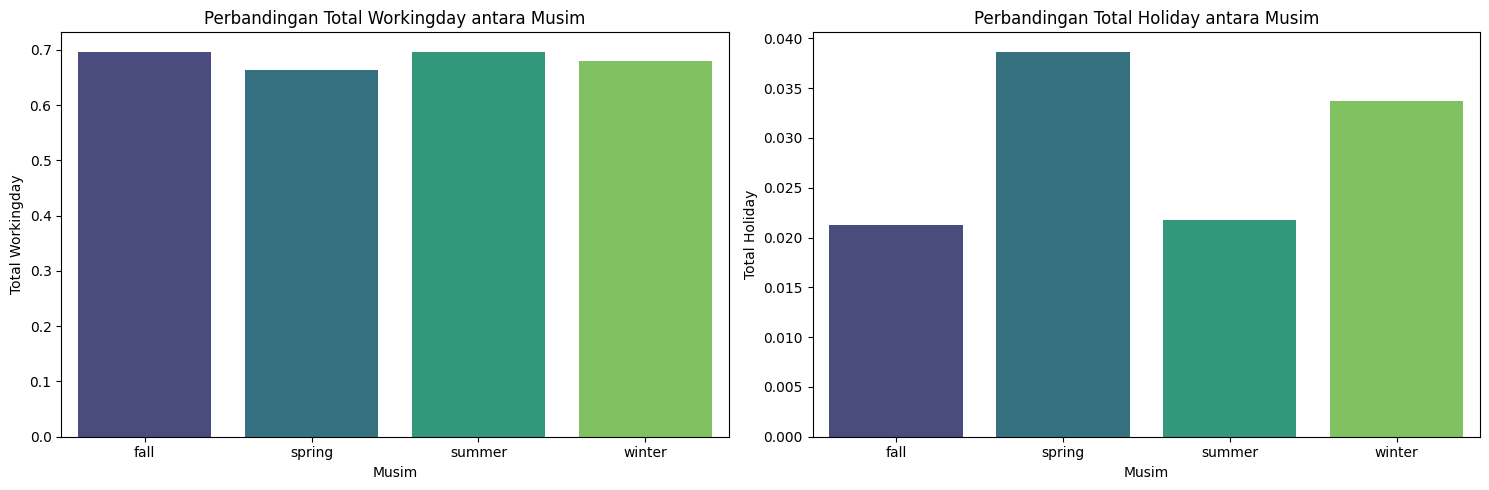

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.barplot(
    x='season',
    y='workingday',
    data=day_df,
    hue='season',
    palette='viridis',
    errorbar=None,
    ax=ax[0],
    legend=False  # Disable legend
)
ax[0].set_xlabel('Musim')
ax[0].set_ylabel('Total Workingday')
ax[0].set_title('Perbandingan Total Workingday antara Musim')

# Bar plot for holiday
sns.barplot(
    x='season',
    y='holiday',
    data=day_df,
    hue='season',
    palette='viridis',
    errorbar=None,
    ax=ax[1],
    legend=False  # Disable legend
)
ax[1].set_xlabel('Musim')
ax[1].set_ylabel('Total Holiday')
ax[1].set_title('Perbandingan Total Holiday antara Musim')

plt.tight_layout()
plt.show()


Dari grafik yang Anda tampilkan, kita dapat memperoleh informasi sebagai berikut:

Perbandingan Total Workingday antara Musim:

- Musim gugur memiliki total workingday tertinggi, diikuti oleh musim panas, - musim dingin, dan musim semi.
- Musim semi memiliki total workingday yang paling rendah.
Perbandingan Total Holiday antara Musim:

- Musim semi memiliki total holiday tertinggi, diikuti oleh musim dingin, musim panas, dan musim gugur.
- Musim semi memiliki total holiday yang signifikan lebih tinggi daripada musim-musim lainnya.
- Musim gugur memiliki total holiday yang paling rendah.

### Pertanyaan 2: Bagaimana hubungan antara temp (suhu) dan total count pengguna sepeda untuk setiap musim periode 2 tahun?

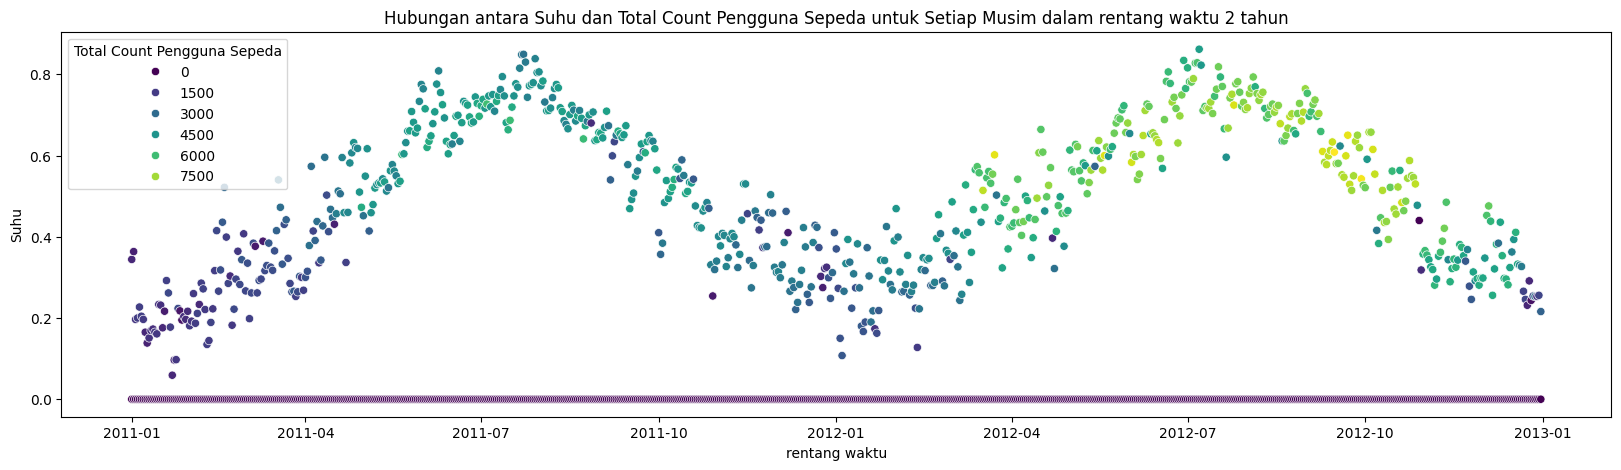

In [18]:
plt.figure(figsize=(20, 5))
colors = plt.get_cmap("viridis")

sns.scatterplot(
    x="dateday",
    y="temp",
    hue="count",
    data=daily,
    palette=colors,
    marker="o"
)

plt.title("Hubungan antara Suhu dan Total Count Pengguna Sepeda untuk Setiap Musim dalam rentang waktu 2 tahun", loc="center", fontsize=12)
plt.xlabel('rentang waktu')
plt.ylabel("Suhu")
plt.legend(title="Total Count Pengguna Sepeda", loc="upper left")
plt.show()


Rentang waktu: Januari 2011 hingga Januari 2013.
Hubungan antara suhu dan jumlah pengguna sepeda:
- Pada suhu yang lebih rendah, jumlah pengguna sepeda cenderung lebih sedikit (sekitar bulan September hingga Februari).
- Pada suhu yang lebih tinggi, jumlah pengguna sepeda cenderung lebih tinggi (sekitar bulan Maret hingga Agustus).
- Variasi dalam jumlah pengguna sepeda di musim semi dan musim gugur, tergantung pada suhu yang dialami.
- Adanya hubungan erat antara suhu dan jumlah pengguna sepeda, di mana suhu yang lebih tinggi mengakibatkan peningkatan penggunaan sepeda.
Dengan demikian, suhu memainkan peran penting dalam menentukan jumlah pengguna sepeda, dengan suhu yang lebih tinggi cenderung meningkatkan penggunaan sepeda, sementara suhu yang lebih rendah cenderung mengurangi penggunaan sepeda.



## Pertanyaan 3: Bagaimana pola penggunaan sepeda selama seminggu dan perbedaannya antara hari kerja dan akhir pekan?

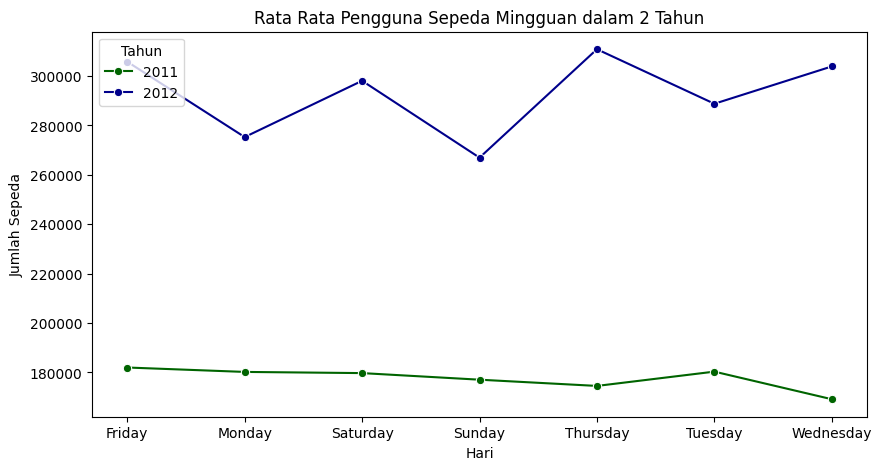

In [19]:
plt.figure(figsize=(10, 5))
colors_ = ["#006400", "#00008B"]

sns.lineplot(
    x="weekday",
    y="count",
    hue="year",
    data=weekdays,
    palette=colors_,
    marker="o"
)

plt.title("Rata Rata Pengguna Sepeda Mingguan dalam 2 Tahun", loc="center", fontsize=12)
plt.xlabel('Hari')
plt.ylabel("Jumlah Sepeda")
plt.legend(title="Tahun", loc="upper left")
plt.show()

Grafik tersebut menggambarkan rata-rata penggunaan sepeda setiap hari dalam seminggu selama dua tahun, dengan garis berbeda mewakili tahun-tahun yang berbeda. Dari grafik tersebut, kita dapat melihat pola penggunaan sepeda yang menarik:

Hari Kerja (Senin-Jumat): Jumlah pengguna sepeda cenderung stabil atau sedikit menurun pada hari kerja, dengan puncak yang lebih rendah pada hari Jumat. Hal ini mungkin menunjukkan bahwa sebagian besar orang menggunakan sepeda untuk transportasi ke tempat kerja atau sekolah pada hari-hari tersebut.

Akhir Pekan (Sabtu-Minggu): Jumlah pengguna sepeda meningkat secara signifikan pada akhir pekan, dengan puncak tertinggi pada hari Sabtu. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau kegiatan santai pada akhir pekan.

Dengan demikian, grafik tersebut menggambarkan pola penggunaan sepeda yang berbeda antara hari kerja dan akhir pekan, di mana penggunaan sepeda cenderung lebih tinggi pada akhir pekan untuk kegiatan rekreasi atau santai.

## Conclusion

- Conclution pertanyaan 1
Kesimpulannya, musim gugur cenderung memiliki total workingday lebih tinggi dan total holiday yang lebih rendah dibandingkan dengan musim-musim lainnya, sementara musim semi cenderung memiliki total workingday lebih rendah dan total holiday yang lebih tinggi. perbedaan total workingday tidak begitu signifikan dibandingkan total holiday. pengguna saat workingday stabil dan pengguna holiday memiliki perbedaan signifikan tergantung musimnya.
- Conclution pertanyaan 2
Kesimpulannya, Dalam rentang waktu ini, terlihat bahwa pada musim semi dan musim panas (sekitar bulan Maret hingga Agustus) ketika suhu meningkat, jumlah pengguna sepeda cenderung lebih tinggi. Sebaliknya, pada musim gugur dan musim dingin (sekitar bulan September hingga Februari), ketika suhu menurun, jumlah pengguna sepeda cenderung lebih rendah. Ini menunjukkan adanya hubungan yang erat antara suhu dan jumlah pengguna sepeda, di mana suhu yang lebih tinggi mengakibatkan peningkatan penggunaan sepeda.
- conclusion pertanyaan 3
Kesimpulannya, Dari grafik ini, kita dapat melihat bahwa pola penggunaan sepeda cenderung berbeda antara hari kerja dan akhir pekan. Pada hari-hari kerja (Senin-Jumat), jumlah pengguna sepeda cenderung stabil atau bahkan sedikit menurun, sementara pada akhir pekan (Sabtu-Minggu), jumlah pengguna sepeda cenderung meningkat.